`20211184 Hee Soo Yang` Lab 1
: In this Lab Session, I tried to run the codes in my VScode environment.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import sys
print('Python version: '+str(sys.version_info[0])+'.'+str(sys.version_info[1]))

Python version: 3.8


In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
print(tf.__version__)

2.9.1


In [13]:
# Download the daset with keras.utils.get_file
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [14]:
column_names = ['CRIM','ZN','INDUS','CHAS','NOX',
                'RM', 'AGE', 'DIS','RAD','TAX','PTRATION', 'B', 'LSTAT', 'MEDV']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
# Create a dataset instant
dataset = raw_dataset.copy()

# This function returns last n rows from the object 
# based on position.
dataset.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [15]:
# Split data into train/test
# p = training data portion
p=0.8
#p=0.01
trainDataset = dataset.sample(frac=p,random_state=0)
testDataset = dataset.drop(trainDataset.index)

In [16]:
testDataset.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
464,7.83932,0.0,18.10,0,0.655,6.209,65.4,2.9634,24,666.0,20.2,396.90,13.22,21.4
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666.0,20.2,22.01,17.15,19.0
470,4.34879,0.0,18.10,0,0.580,6.167,84.0,3.0334,24,666.0,20.2,396.90,16.29,19.9
472,3.56868,0.0,18.10,0,0.580,6.437,75.0,2.8965,24,666.0,20.2,393.37,14.36,23.2
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666.0,20.2,396.21,18.68,16.7
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711.0,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711.0,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711.0,20.1,318.43,29.68,8.1
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711.0,20.1,396.90,13.35,20.1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [17]:
len(trainDataset), len(testDataset)

(405, 101)

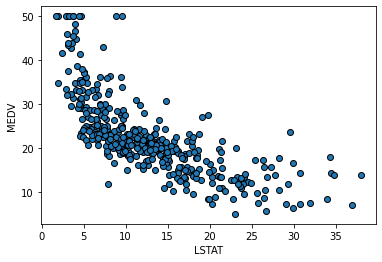

In [18]:
# Visual representation of training data
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# With .pop() command, the associated columns are extracted.
#x = trainDataset['RM']
#x = trainDataset['CRIM']
x = trainDataset['LSTAT']
y = trainDataset['MEDV']
ax.scatter(x, y, edgecolors=(0, 0, 0))
#ax.set_xlabel('RM')
#ax.set_xlabel('CRIM')
ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV')
plt.show()

In [19]:
# Pop command return item and drop it from frame.
# After using trainDataset.pop('RM'), the 'RM' column 
# does not exist in the trainDataset frame anymore!
#trainInput = trainDataset['RM']
trainInput = trainDataset['LSTAT']
trainTarget = trainDataset['MEDV']
#testInput = testDataset['RM']
testInput = testDataset['LSTAT']
testTarget = testDataset['MEDV']

In [20]:
# We don't specify anything for activation -> no activation is applied (ie. "linear" activation: a(x) = x)
# Check: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

def linear_model():
  model = keras.Sequential([
        layers.Dense(1, use_bias=True, input_shape=(1,), name='layer')
      ])

  # Using adam optimizer
  optimizer = tf.keras.optimizers.Adam(
      learning_rate=0.01, beta_1=0.9, beta_2=0.99, epsilon=1e-05, amsgrad=False,
      name='Adam')
    
  # Check: https://www.tensorflow.org/api_docs/python/tf/keras/Model
  # loss: String (name of objective function), objective function or tf.keras.losses.Loss instance. See tf.keras.losses.
  # optimizer: String (name of optimizer) or optimizer instance. See tf.keras.optimizers.
  # metrics: List of metrics to be evaluated by the model during training and testing
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])

  return model

# Create model instant
model = linear_model()

# Model plot
tf.keras.utils.plot_model(
  model, to_file='model.png', show_shapes=True, show_layer_names=True,
  rankdir='TB', expand_nested=False, dpi=100
  )

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


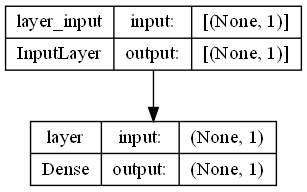

In [21]:
from IPython.display import Image
Image('model.png')

In [22]:
# params
n_epochs = 4000 #Note: Early termination means this 4000 number might not be reached! - TA
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200 
#manual override to force more frequent saves -TA
#n_samples_save = n_epochs_log * trainInput.shape[0]
n_samples_save = n_epochs_log
print('Checkpoint is saved for each {} samples'.format(n_samples_save))

# A mechanism that stops training if the validation loss is not improving for more than n_idle_epochs.
#See https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping for details.
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=n_idle_epochs, min_delta=0.001)#0.001

# Creating a custom callback to print the log after a certain number of epochs
# Check: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
predictions_list = []
class NEPOCHLogger(tf.keras.callbacks.Callback):
    def __init__(self,per_epoch=100):
        '''
        display: Number of batches to wait before outputting loss
        '''
        self.seen = 0
        self.per_epoch = per_epoch
    
    def on_epoch_end(self, epoch, logs=None):
      if epoch % self.per_epoch == 0:
        print('Epoch {}, loss {:.2f}, val_loss {:.2f}, mae {:.2f}, val_mae {:.2f}, mse {:.2f}, val_mse {:.2f}'\
              .format(epoch, logs['loss'], logs['val_loss'],logs['mae'], logs['val_mae'],logs['mse'], logs['val_mse']))
              
# Call the object
log_display = NEPOCHLogger(per_epoch=n_epochs_log)

# Include the epoch in the file name (uses `str.format`)
import os
checkpoint_path = "training/cp-{epoch:05d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=n_samples_save) 

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(
  trainInput, trainTarget, batch_size=batch_size,
  epochs=n_epochs, validation_split = 0.1, verbose=0, callbacks=[earlyStopping,log_display,tensorboard_callback,checkpointCallback])#Delete earlyStopping, if you want full duration training

Checkpoint is saved for each 200 samples
Epoch 0, loss 307.11, val_loss 426.93, mae 13.81, val_mae 17.38, mse 307.11, val_mse 426.93

Epoch 100: saving model to training\cp-00100.ckpt

Epoch 200: saving model to training\cp-00200.ckpt
Epoch 200, loss 244.99, val_loss 339.64, mae 12.29, val_mae 15.14, mse 244.99, val_mse 339.64

Epoch 300: saving model to training\cp-00300.ckpt

Epoch 400: saving model to training\cp-00400.ckpt
Epoch 400, loss 194.56, val_loss 273.60, mae 10.75, val_mae 13.36, mse 194.56, val_mse 273.60

Epoch 500: saving model to training\cp-00500.ckpt

Epoch 600: saving model to training\cp-00600.ckpt
Epoch 600, loss 151.54, val_loss 215.87, mae 9.28, val_mae 11.55, mse 151.54, val_mse 215.87

Epoch 700: saving model to training\cp-00700.ckpt

Epoch 800: saving model to training\cp-00800.ckpt
Epoch 800, loss 115.48, val_loss 167.52, mae 7.85, val_mae 9.83, mse 115.48, val_mse 167.52

Epoch 900: saving model to training\cp-00900.ckpt

Epoch 1000: saving model to traini

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


<AxesSubplot:>

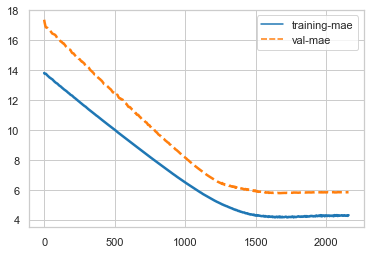

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns

# The fit model returns the history object for each Keras model
# Let's explore what is inside history
print('keys:', history.history.keys())

# Returning the desired values for plotting and turn to numpy array
mae = np.asarray(history.history['mae'])
val_mae = np.asarray(history.history['val_mae'])

# Creating the data frame
num_values = (len(mae))
values = np.zeros((num_values,2), dtype=float)
values[:,0] = mae
values[:,1] = val_mae

# Using pandas to frame the data
steps = pd.RangeIndex(start=0,stop=num_values)
data = pd.DataFrame(values, steps, columns=["training-mae", "val-mae"])

# Plotting
sns.set(style="whitegrid")
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

4/4 [==============================] - 0s 2ms/step


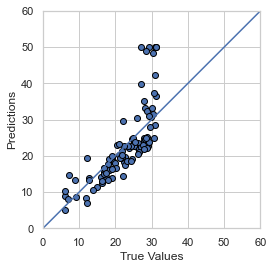

In [24]:
predictions = model.predict(testInput).flatten()
plt.axes(aspect='equal')
plt.scatter(predictions, testTarget, edgecolors=(0, 0, 0))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

checkpoints: ['cp-00000.ckpt', 'cp-00100.ckpt', 'cp-00200.ckpt', 'cp-00300.ckpt', 'cp-00400.ckpt', 'cp-00500.ckpt', 'cp-00600.ckpt', 'cp-00700.ckpt', 'cp-00800.ckpt', 'cp-00900.ckpt', 'cp-01000.ckpt', 'cp-01100.ckpt', 'cp-01200.ckpt', 'cp-01300.ckpt', 'cp-01400.ckpt', 'cp-01500.ckpt', 'cp-01600.ckpt', 'cp-01700.ckpt', 'cp-01800.ckpt', 'cp-01900.ckpt', 'cp-02000.ckpt', 'cp-02100.ckpt']
Displaying checkpointcp-00000.ckpt
Displaying checkpointcp-00100.ckpt
Displaying checkpointcp-00200.ckpt
Displaying checkpointcp-00300.ckpt
Displaying checkpointcp-00400.ckpt
Displaying checkpointcp-00500.ckpt
Displaying checkpointcp-00600.ckpt
Displaying checkpointcp-00700.ckpt
Displaying checkpointcp-00800.ckpt
Displaying checkpointcp-00900.ckpt
Displaying checkpointcp-01000.ckpt
Displaying checkpointcp-01100.ckpt
Displaying checkpointcp-01200.ckpt
Displaying checkpointcp-01300.ckpt
Displaying checkpointcp-01400.ckpt
Displaying checkpointcp-01500.ckpt
Displaying checkpointcp-01600.ckpt
Displaying checkp

<ipython-input-25-1a9d6504725c>:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Displaying checkpointcp-02100.ckpt


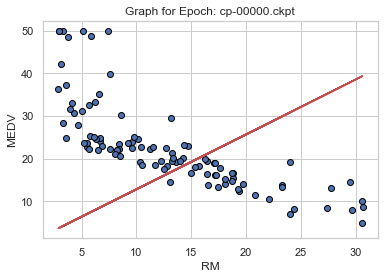

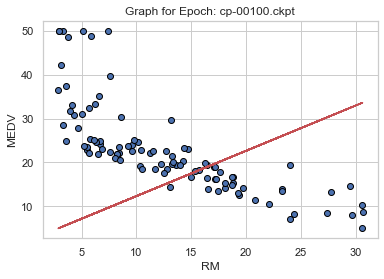

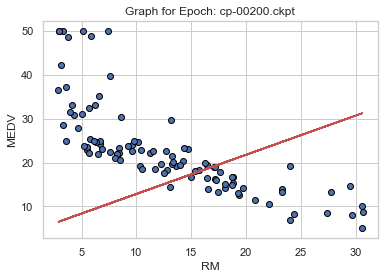

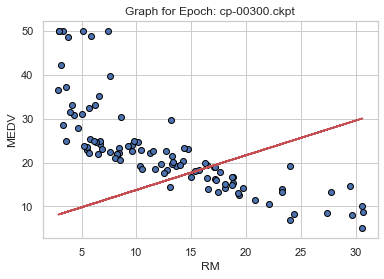

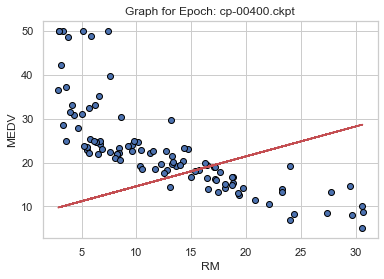

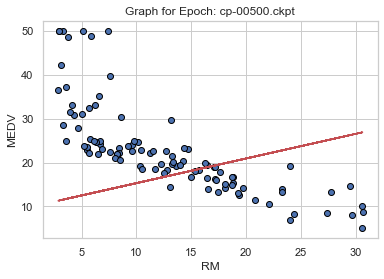

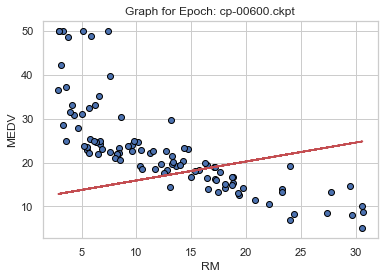

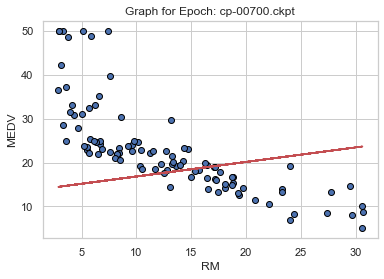

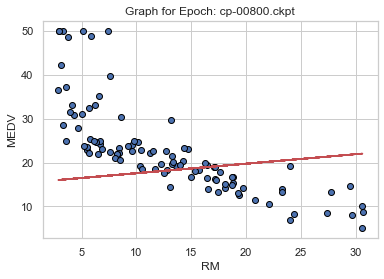

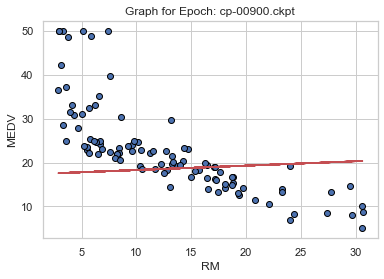

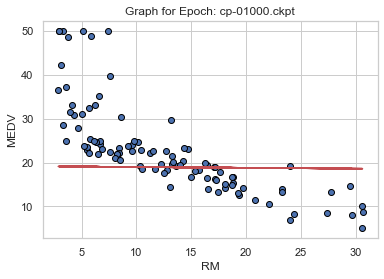

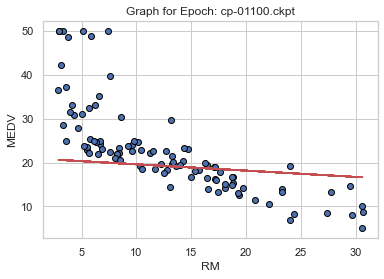

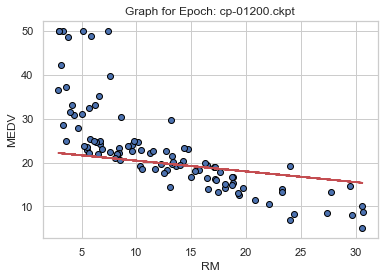

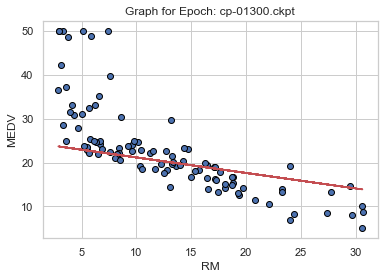

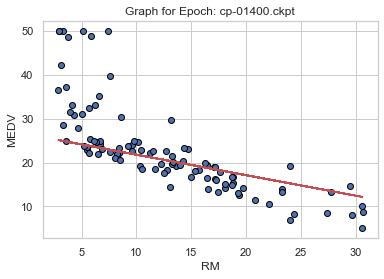

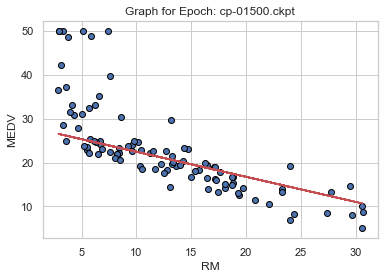

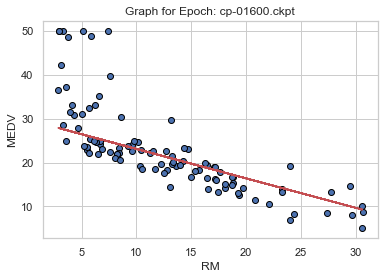

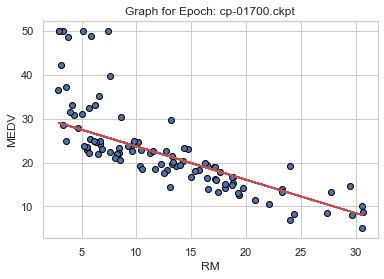

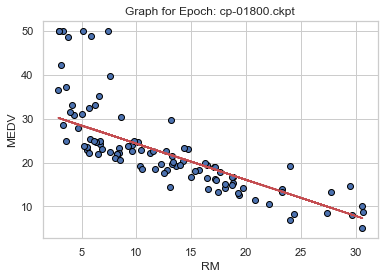

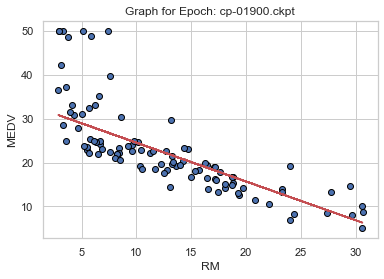

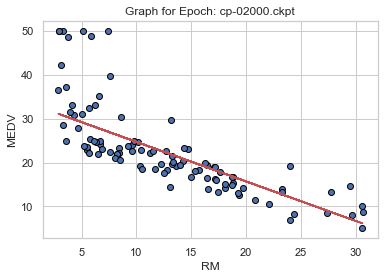

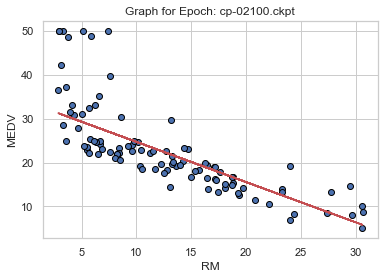

In [25]:
# Get the saved checkpoint files
checkpoints = []
for f_name in os.listdir(checkpoint_dir):
  if f_name.startswith('cp-'):
    file_with_no_ext = os.path.splitext(f_name)[0]
    checkpoints.append(file_with_no_ext)

# Return unique list elements
checkpoints = list(set(checkpoints))
checkpoints.sort() #Sort list by file name -TA
print('checkpoints:',checkpoints)

# Suppress tensorflow warnings -TA
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Load all model checkpoints and evaluate for each
count = 0
model_improvement_progress = True
if model_improvement_progress:
  for checkpoint in checkpoints:
    count += 1
    # Call model instant
    model = linear_model()
    
    # Restore the weights
    path = os.path.join('training',checkpoint)
    model.load_weights(path)

    # Access to layer weights
    layer = model.get_layer('layer')
    w1,w0 = layer.get_weights()
    w1 = float(w1[0])
    w0 = float(w0[0])
    
    # Draw the scatter plot of data
    fig, ax = plt.subplots()
    x = testInput
    y = testTarget
    ax.scatter(x, y, edgecolors=(0, 0, 0))
    ax.set_xlabel('RM')
    ax.set_ylabel('MEDV')
    
    # Plot the line
    y_hat = w1*x + w0
    print('Displaying checkpoint'+checkpoint)
    plt.title('Graph for Epoch: '+str(checkpoint))
    plt.plot(x, y_hat, '-r')
    plt.savefig(os.path.join(str(checkpoint)+'.png'))

    


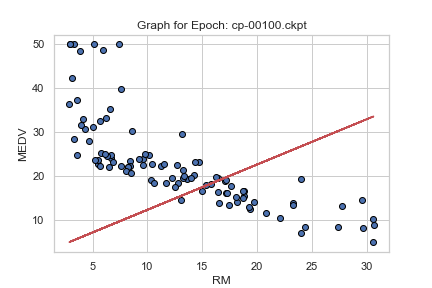

In [26]:
from IPython.display import Image
Image('cp-00100.ckpt.png')